In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import re
from pandas.plotting import scatter_matrix

In [3]:
pd.set_option('display.max_columns',None)
df_main = pd.read_csv("ShowcaseDataWinter2023.csv")

In [4]:
df_semi = df_main.drop(['trim_descrip','trim_descrip_appraisal','body','body_appraisal'], axis=1)
df_semi = df_semi.dropna()
df_semi

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Red,2.0L,4,27.0,33.0,152,16.0,2001.0,200k+ miles,AIH,AIH_32,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Silver,3.5L,6,19.0,27.0,285,18.0,1996.0,0 to 10k miles,KQZ,KQZ_3,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Black,2.5L,4,24.0,30.0,187,15.0,2014.0,10k to 20k miles,CIP,CIP_16,Red,2.0L,4,41.0,38,181,10.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Blue,2.5L,4,17.0,23.0,305,15.0,2011.0,20k to 30k miles,LTX,LTX_20,Black,2.4L,4,20.0,29,182,18.0,16
5,$15k to $20k,$5k to $10k,0.0,2013.0,35k to 40k miles,OFW,OFW_11,White,2.4L,4,25.0,35.0,185,18.0,2009.0,160k to 170k miles,FJE,FJE_10,Black,3.6L,6,18.0,27,292,19.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,$15k to $20k,1.0,2013.0,10k to 15k miles,OFW,OFW_6,Black,2.0L,4,28.0,37.0,147,14.0,2015.0,0 to 10k miles,LTX,LTX_30,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,$10k to $15k,0.0,2014.0,55k to 60k miles,ARU,ARU_12,White,2.5L,4,27.0,37.0,182,16.0,2010.0,50k to 60k miles,HXQ,HXQ_8,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,$0k to $5k,0.0,2014.0,10k to 15k miles,AIH,AIH_13,Silver,2.5L,4,28.0,39.0,206,16.0,2004.0,120k to 130k miles,HXQ,HXQ_14,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,$10k to $15k,0.0,2012.0,50k to 55k miles,KQZ,KQZ_3,Black,3.5L,6,17.0,23.0,282,23.0,2006.0,130k to 140k miles,BZQ,BZQ_4,White,5.7L,8,13.0,19,390,26.0,11


In [5]:
def createTable(col, df):
    
    col_count = pd.DataFrame(df.groupby(col)[col].count())
    col_count.columns = ['count']
    col_count = col_count.reset_index()
    col_count[col] = col_count[col].str.replace(' to ','-')
    if col == 'appraisal_offer':
        col_count = col_count.reindex([0,8,1,2,3,4,5,6,7])
        col_count = col_count.reset_index().drop('index',axis=1)
    
    return col_count

appraisal_df = createTable('appraisal_offer',df_semi)
price_df = createTable('price',df_semi)

In [6]:
appraisal_df

,appraisal_offer,count
0,$0k-$5k,61089
1,$5k-$10k,34263
2,$10k-$15k,24676
3,$15k-$20k,19894
4,$20k-$25k,14116
5,$25k-$30k,8586
6,$30k-$35k,5146
7,$35k-$40k,3209
8,$40k+,3237


In [7]:
appraisal_df['count'][:3].sum()

120028

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '$0-$15k'),
  Text(1, 0, '$15k-$20k'),
  Text(2, 0, '$20k-$25k'),
  Text(3, 0, '$25k-$30k'),
  Text(4, 0, '$30k-$35k'),
  Text(5, 0, '$35k-$40k'),
  Text(6, 0, '$40k-$45k'),
  Text(7, 0, '$45k-$50k'),
  Text(8, 0, '$50k-$55k'),
  Text(9, 0, '$55k-$60k'),
  Text(10, 0, '$60k-$65k'),
  Text(11, 0, '$65k-$70k'),
  Text(12, 0, '$70k+')])

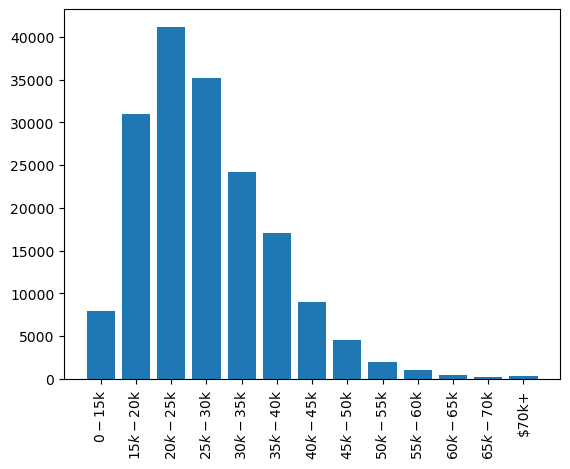

In [8]:
plt.bar(price_df['price'], price_df['count'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$0k-$5k'),
  Text(1, 0, '$5k-$10k'),
  Text(2, 0, '$10k-$15k'),
  Text(3, 0, '$15k-$20k'),
  Text(4, 0, '$20k-$25k'),
  Text(5, 0, '$25k-$30k'),
  Text(6, 0, '$30k-$35k'),
  Text(7, 0, '$35k-$40k'),
  Text(8, 0, '$40k+')])

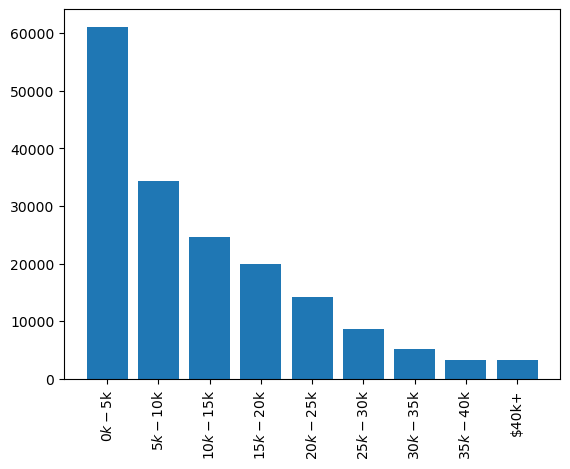

In [9]:
plt.bar(appraisal_df['appraisal_offer'], appraisal_df['count'])
plt.xticks(rotation=90)

In [10]:
appraisal_count = pd.DataFrame(df_semi.groupby('appraisal_offer')['appraisal_offer'].count())
appraisal_count.columns = ['count']
appraisal_count = appraisal_count.reset_index()
appraisal_count['appraisal_offer'] = appraisal_count['appraisal_offer'].str.replace(' to ','-')
appraisal_count = appraisal_count.reindex
appraisal_count

<bound method DataFrame.reindex of   appraisal_offer  count
0         $0k-$5k  61089
1       $10k-$15k  24676
2       $15k-$20k  19894
3       $20k-$25k  14116
4       $25k-$30k   8586
5       $30k-$35k   5146
6       $35k-$40k   3209
7           $40k+   3237
8        $5k-$10k  34263>

In [11]:
plt.bar(appraisal_count['appraisal_offer'],appraisal_count['count'])
plt.xticks(rotation=90)

TypeError: 'method' object is not subscriptable

In [18]:
price_count = pd.DataFrame(df_semi.groupby('price')['price'].count())
price_count.columns = ['count']
# pd.set_option('display.max_columns',4)
price_count = price_count.reset_index()
price_count['price'] = price_count['price'].str.replace(' to ','-')
price_count

,price,count
0,$0-$15k,7947
1,$15k-$20k,31015
2,$20k-$25k,41172
3,$25k-$30k,35125
4,$30k-$35k,24239
5,$35k-$40k,16998
6,$40k-$45k,8988
7,$45k-$50k,4579
8,$50k-$55k,2009
9,$55k-$60k,1042


In [19]:
# price_count.pivot(index=1, columns='price')

In [20]:
df_semi.groupby('appraisal_offer')['appraisal_offer'].count()

appraisal_offer
$0k to $5k      61089
$10k to $15k    24676
$15k to $20k    19894
$20k to $25k    14116
$25k to $30k     8586
$30k to $35k     5146
$35k to $40k     3209
$40k+            3237
$5k to $10k     34263
Name: appraisal_offer, dtype: int64

In [21]:
df_semi.hist(column='price')
plt.xticks(rotation=90)

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [22]:
def convertCols(df=df_semi, include_trim=True):
    
    df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int')
    df['model_year'] = df['model_year'].astype('int')
    df['model_year_appraisal'] = df['model_year_appraisal'].astype('int')
    
    trim_bool = {
        'Premium': 1,
        'Not Premium': 0
    }
    
    df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
    df['model_appraisal'] = [int(re.findall(r'\d+',i)[0]) for i in df['model_appraisal']]
    
    if include_trim==True:
        df['trim_descrip'] = df['trim_descrip'].map(trim_bool)
        df['trim_descrip_appraisal'] = df['trim_descrip_appraisal'].map(trim_bool)
    
    df['engine'] = [float(i.replace('L','')) for i in df['engine']]
    df['engine_appraisal'] = [float(i.replace('L','')) for i in df['engine_appraisal']]
    
    return df

from sklearn.preprocessing import OrdinalEncoder

def encodeVariables(col, df=df_semi):
    # in order to automate the ordering, extract the first set of numbers and order by ascending
    if col == 'price':
        categories = ['$0 to $15k','$15k to $20k', '$20k to $25k','$25k to $30k','$30k to $35k', '$35k to $40k', 
        '$40k to $45k',  '$45k to $50k','$50k to $55k','$55k to $60k','$60k to $65k','$65k to $70k','$70k+']
    elif col == 'appraisal_offer':
        categories = ['$0k to $5k','$5k to $10k','$10k to $15k','$15k to $20k','$20k to $25k','$25k to $30k','$30k to $35k','$35k to $40k','$40k+']
    elif col == 'mileage':
        categories = ['0 to 5k miles','5k to 10k miles', '10k to 15k miles','15k to 20k miles','20k to 25k miles','25k to 30k miles','30k to 35k miles', '35k to 40k miles','40k to 45k miles', 
                      '45k to 50k miles','50k to 55k miles','55k to 60k miles','60k to 65k miles','65k to 70k miles','70k to 75k miles','75k to 80k miles','80k to 85k miles','85k to 90k miles',
                      '90k to 95k miles','95k to 100k miles','100k+ miles']
    elif col == 'mileage_appraisal':
        categories = ['0 to 10k miles','10k to 20k miles','20k to 30k miles','30k to 40k miles','40k to 50k miles','50k to 60k miles','60k to 70k miles','70k to 80k miles','80k to 90k miles', 
                      '90k to 100k miles','100k to 110k miles','110k to 120k miles','120k to 130k miles', '130k to 140k miles','140k to 150k miles','150k to 160k miles','160k to 170k miles',
                      '170k to 180k miles','180k to 190k miles','190k to 200k miles','200k+ miles']
    
    encoder = OrdinalEncoder(categories=[categories])
    # print(enc)
    encoded_list = encoder.fit_transform(df[col].values.reshape(-1,1))
    
    return encoder, encoded_list

def encodeDF(df):
    
    _, df['price'] = encodeVariables('price',df)
    _, df['appraisal_offer'] = encodeVariables('appraisal_offer',df)
    _, df['mileage'] = encodeVariables('mileage',df)
    _, df['mileage_appraisal'] = encodeVariables('mileage_appraisal',df)
    
    return df

In [23]:
df_semi = convertCols(df_semi, include_trim=False)
df_semi = encodeDF(df_semi)
df_semi

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,2.0,0.0,1,2014,3.0,HDT,12,Red,2.0,4,27.0,33.0,152,16.0,2001,20.0,AIH,32,Silver,4.0,6,17.0,21,236,21.0,13
1,1.0,0.0,0,2006,20.0,KQZ,23,Silver,3.5,6,19.0,27.0,285,18.0,1996,0.0,KQZ,3,Gold,4.2,6,16.0,21,205,25.0,11
2,4.0,7.0,1,2014,1.0,CZV,10,Black,2.5,4,24.0,30.0,187,15.0,2014,1.0,CIP,16,Red,2.0,4,41.0,38,181,10.0,13
4,4.0,3.0,1,2011,7.0,HDT,8,Blue,2.5,4,17.0,23.0,305,15.0,2011,2.0,LTX,20,Black,2.4,4,20.0,29,182,18.0,16
5,1.0,1.0,0,2013,7.0,OFW,11,White,2.4,4,25.0,35.0,185,18.0,2009,16.0,FJE,10,Black,3.6,6,18.0,27,292,19.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,3.0,1,2013,2.0,OFW,6,Black,2.0,4,28.0,37.0,147,14.0,2015,0.0,LTX,30,Black,1.4,4,26.0,31,138,14.0,1
199996,2.0,2.0,0,2014,11.0,ARU,12,White,2.5,4,27.0,37.0,182,16.0,2010,5.0,HXQ,8,Black,1.8,4,30.0,39,143,13.0,8
199997,4.0,0.0,0,2014,2.0,AIH,13,Silver,2.5,4,28.0,39.0,206,16.0,2004,12.0,HXQ,14,Gray,2.4,4,21.0,30,177,18.0,3
199998,4.0,2.0,0,2012,10.0,KQZ,3,Black,3.5,6,17.0,23.0,282,23.0,2006,13.0,BZQ,4,White,5.7,8,13.0,19,390,26.0,11


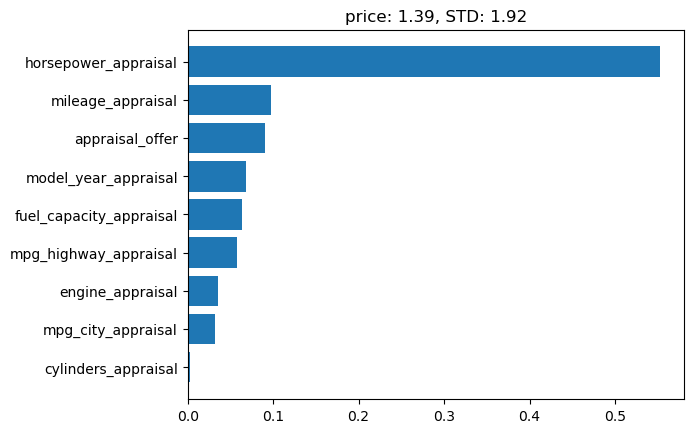

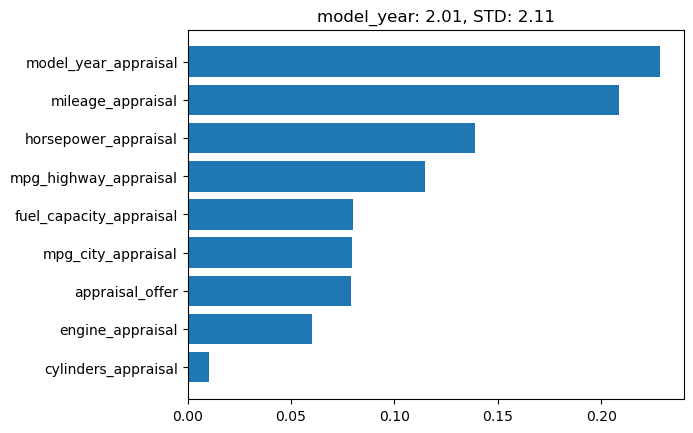

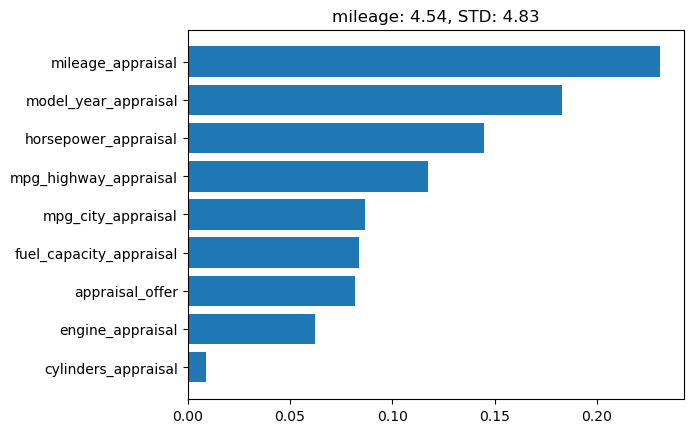

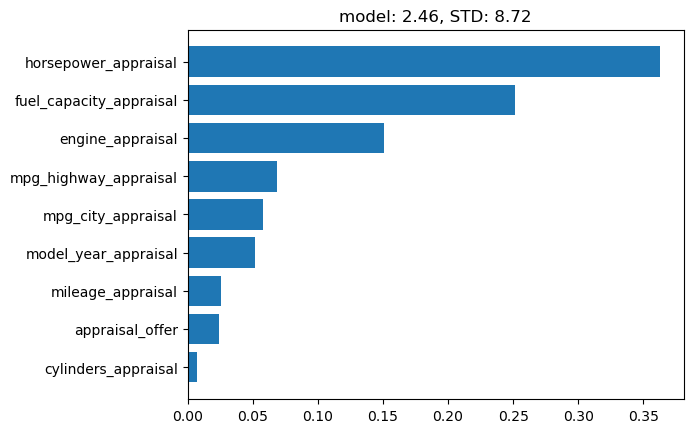

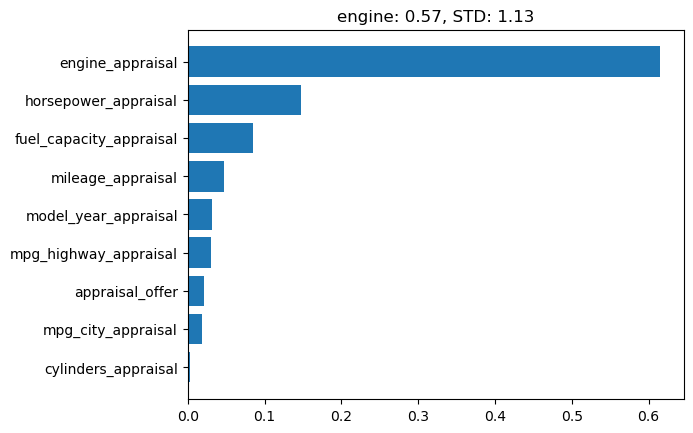

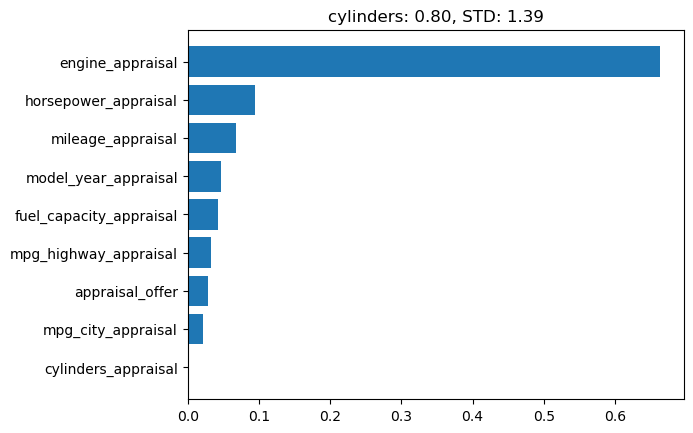

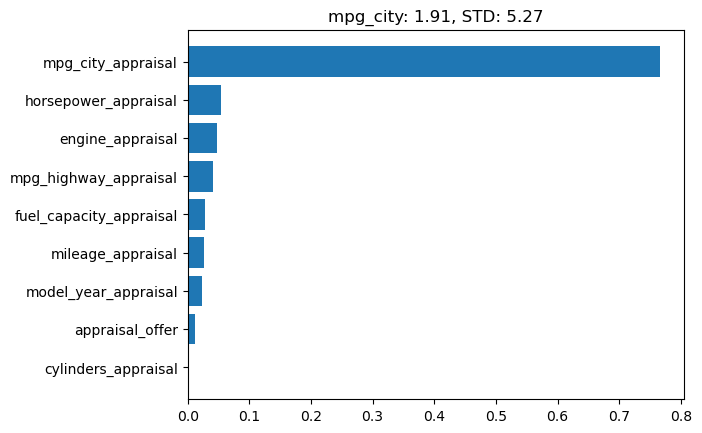

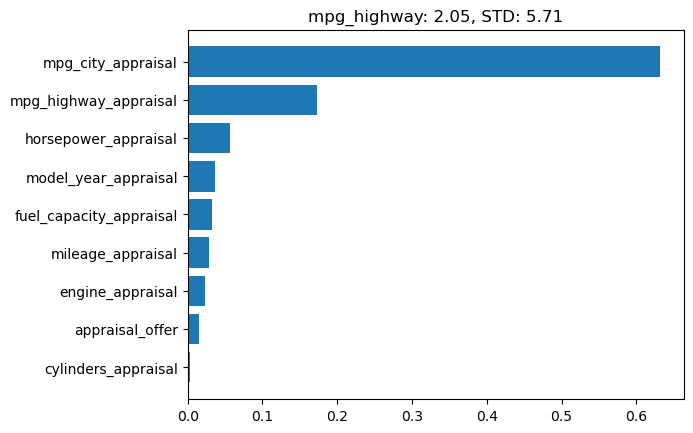

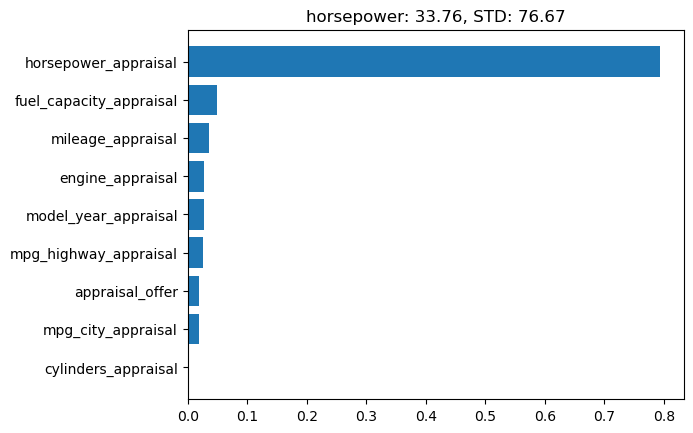

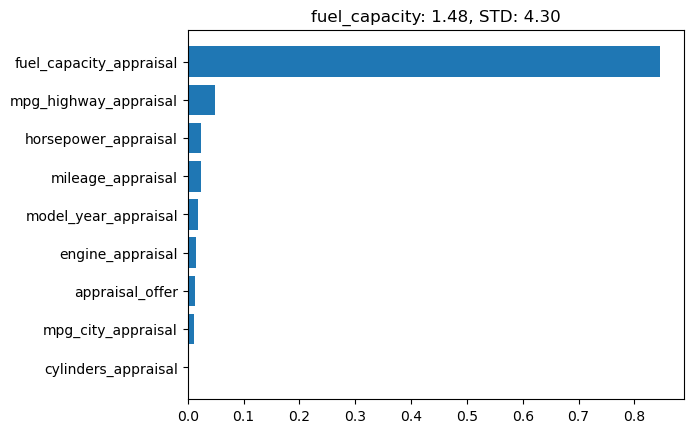

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def createModel(df_semi=df_semi):
    purchased_list = ['price','model_year','mileage','model','engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']

    for i in purchased_list:
        
        scaler = MinMaxScaler()

        X = df_semi.copy()
        X_sub = X[(df_semi['make'] == df_semi['make_appraisal']) & (df_semi['model'] == df_semi['model_appraisal'])]
        X = X_sub.loc[:,['appraisal_offer',
                   'model_year_appraisal', 'mileage_appraisal',
                   'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
                   'fuel_capacity_appraisal']]
        # X = df.loc[:,['appraisal_offer',
        #            'model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', ]]
        y = X_sub.loc[:,i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # param_grid = [
        #     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        #     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
        #   ]

        # forest_reg = RandomForestRegressor()

        # grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
        #                            scoring='neg_mean_squared_error',
        #                            return_train_score=True)

        # grid_search.fit(X_train, y_train)
        # model = LogisticRegression()
        # model = RandomForestClassifier()
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        # predictions = grid_search.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        # print(f'{i}: {np.sqrt(mse)}')
        feature_ranking = sorted([(name, score) for name, score in zip(model.feature_importances_, X.columns)])
        plt.figure()
        plt.barh(list(zip(*feature_ranking))[1],list(zip(*feature_ranking))[0],)
        plt.title(f'{i}: {np.sqrt(mse):.2f}, STD: {df_semi[i].std():.2f}')

        # cm = confusion_matrix(y_test, predictions)
        # print(cm)
        # print(accuracy_score(y_test,predictions))
        # print(roc_auc_score(y_test, predictions))
            
createModel()

# Implement KNN

In [27]:
X_sub

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
8,4.0,4.0,0,2013,7.0,FVQ,4,Black,3.6,6,18.0,25.0,310,19.0,2010,6.0,FVQ,4,Black,3.6,6,17.0,24,288,22.0,9
16,1.0,0.0,0,2010,16.0,KQZ,23,Gray,2.0,4,20.0,28.0,245,18.0,2005,19.0,KQZ,23,Black,3.5,6,18.0,25,265,19.0,5
37,2.0,1.0,1,2012,8.0,JHO,10,Red,2.0,4,24.0,33.0,210,14.0,2007,9.0,JHO,10,Black,2.0,4,22.0,33,200,14.0,8
41,2.0,3.0,0,2013,3.0,LTX,20,Brown,1.5,4,24.0,30.0,170,15.0,2013,2.0,LTX,20,Gold,1.5,4,26.0,32,170,14.0,1
58,1.0,0.0,0,2011,9.0,ARU,12,Gray,2.5,4,27.0,39.0,182,18.0,2001,13.0,ARU,12,Black,3.5,6,20.0,29,250,20.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199959,3.0,4.0,0,2014,13.0,LTX,12,White,3.6,6,18.0,25.0,308,21.0,2013,5.0,LTX,12,White,2.5,4,20.0,26,200,21.0,15
199971,1.0,0.0,0,2012,10.0,HDT,7,Black,2.0,4,24.0,32.0,152,13.0,2000,20.0,HDT,7,Blue,2.5,4,23.0,30,165,15.0,14
199973,7.0,4.0,0,2014,7.0,BZQ,4,Black,5.7,8,19.0,24.0,395,26.0,2010,8.0,BZQ,4,Blue,3.6,6,16.0,23,305,26.0,6
199974,3.0,2.0,0,2013,4.0,HXQ,14,Gray,1.5,4,29.0,35.0,192,14.0,2009,11.0,HXQ,14,Silver,2.4,4,27.0,36,185,17.0,9


In [25]:
scaler = MinMaxScaler()

X = df_semi.copy()
X_sub = X[(df_semi['make'] == df_semi['make_appraisal']) & (df_semi['model'] == df_semi['model_appraisal'])]
X = X_sub.loc[:,['appraisal_offer',
           'model_year_appraisal', 'mileage_appraisal',
           'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
           'fuel_capacity_appraisal']]
# X = df.loc[:,['appraisal_offer',
#            'model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', ]]
y = X_sub.loc[:,'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier(n_neighbors = 100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[  0  31  30   4   1   0   0   0   0   0   0   0   0]
 [  0 109 164  41   6   3   0   0   0   0   0   0   0]
 [  0  68 287  95  28  10   2   0   0   0   0   0   0]
 [  0  34 168 141  64  42  11   2   0   0   0   0   0]
 [  0   4  65  93  92  86  20   2   0   0   0   0   0]
 [  0   1  18  51  82 117  42   2   0   0   0   0   0]
 [  0   0   6  28  39  89  32  11   0   0   0   0   0]
 [  0   0   3   8  25  46  22  10   0   0   0   0   0]
 [  0   0   0   1   7  23  14  16   0   0   0   0   0]
 [  0   0   0   0   5  14   5   9   0   0   0   0   0]
 [  0   0   0   0   2   3   5   2   0   0   0   0   0]
 [  0   0   0   1   2   1   4   3   0   0   0   0   0]
 [  0   0   0   0   1   4   3   8   0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        66
         1.0       0.44      0.34      0.38       323
         2.0       0.39      0.59      0.47       490
         3.0       0.30   

C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ash\anaconda3\envs\carmax\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
